In [1]:
from ipywidgets import IntProgress
IntProgress(10,max=100)

IntProgress(value=10)

In [2]:
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [3]:
import sys
print(sys.executable)

#sys.path.append('./anaconda3/lib/python3.7/site-packages')

/Library/Frameworks/Python.framework/Versions/3.6/bin/python3


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# From Gaia Clusters Notebook

from astroquery.gaia import Gaia

import astropy.units as u
import gzip
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity

from astroquery.simbad import Simbad
from scipy.stats import kde
import matplotlib as mpl
import os
import time
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statistics import median
from math import *
%matplotlib inline

import scipy as sp

from mpl_toolkits import mplot3d
from scipy.stats import gaussian_kde

import ipywidgets as widgets
from IPython.display import display, clear_output


import starcolorindexSpT
import GaiaFunctionstDictArc as tb
     
print("\nInitialize!")
    


Initialize!


In [7]:
# Save default background color display

Ipython_default = plt.rcParams.copy()

# reset rcParams
#plt.rcParams.update(Ipython_default)

In [8]:
plt.style.use('dark_background')

In [9]:

# Add timing functions to measure how long database queries take.

from datetime import datetime

def timer_start():
  global start_time
  start_time = datetime.now()

def timer_stop():
  time_elapsed = datetime.now() - start_time

  da, remainder  = divmod(time_elapsed.total_seconds(), 24*3600)
  hrs, remainder = divmod(remainder, 3600)
  mins, secs = divmod(remainder, 60)

  if da:
      print(f'{int(da)} days {int(hrs)} hours {int(mins)} minutes {int(secs)} seconds elapsed')
  elif hrs:
      print(f'{int(hrs)} hours {int(mins)} minutes {int(secs)} seconds elapsed')
  elif mins:
      print(f'{int(mins)} minutes {int(secs)} seconds elapsed')
  elif secs >= 1.0:
      print(f'{int(secs)} seconds elapsed')
  else:
      print(f'{secs:.2} seconds elapsed')
        
print('timer functions loaded')

timer functions loaded


In [10]:
def dms_to_dd(sign, d, m, s):
    dd = abs(d) + float(abs(m))/60 + float(abs(s))/3600
    if sign=='-':
        dd *= -1
    elif sign!='+':
        assert False, "Don't forget to include a sign. For example, dms_to_dd('-', 5, 23, 28)"
    return dd

def hms_to_dd(h, m, s):
    dd = h*15 + float(m)/4 + float(s)/240
    return dd


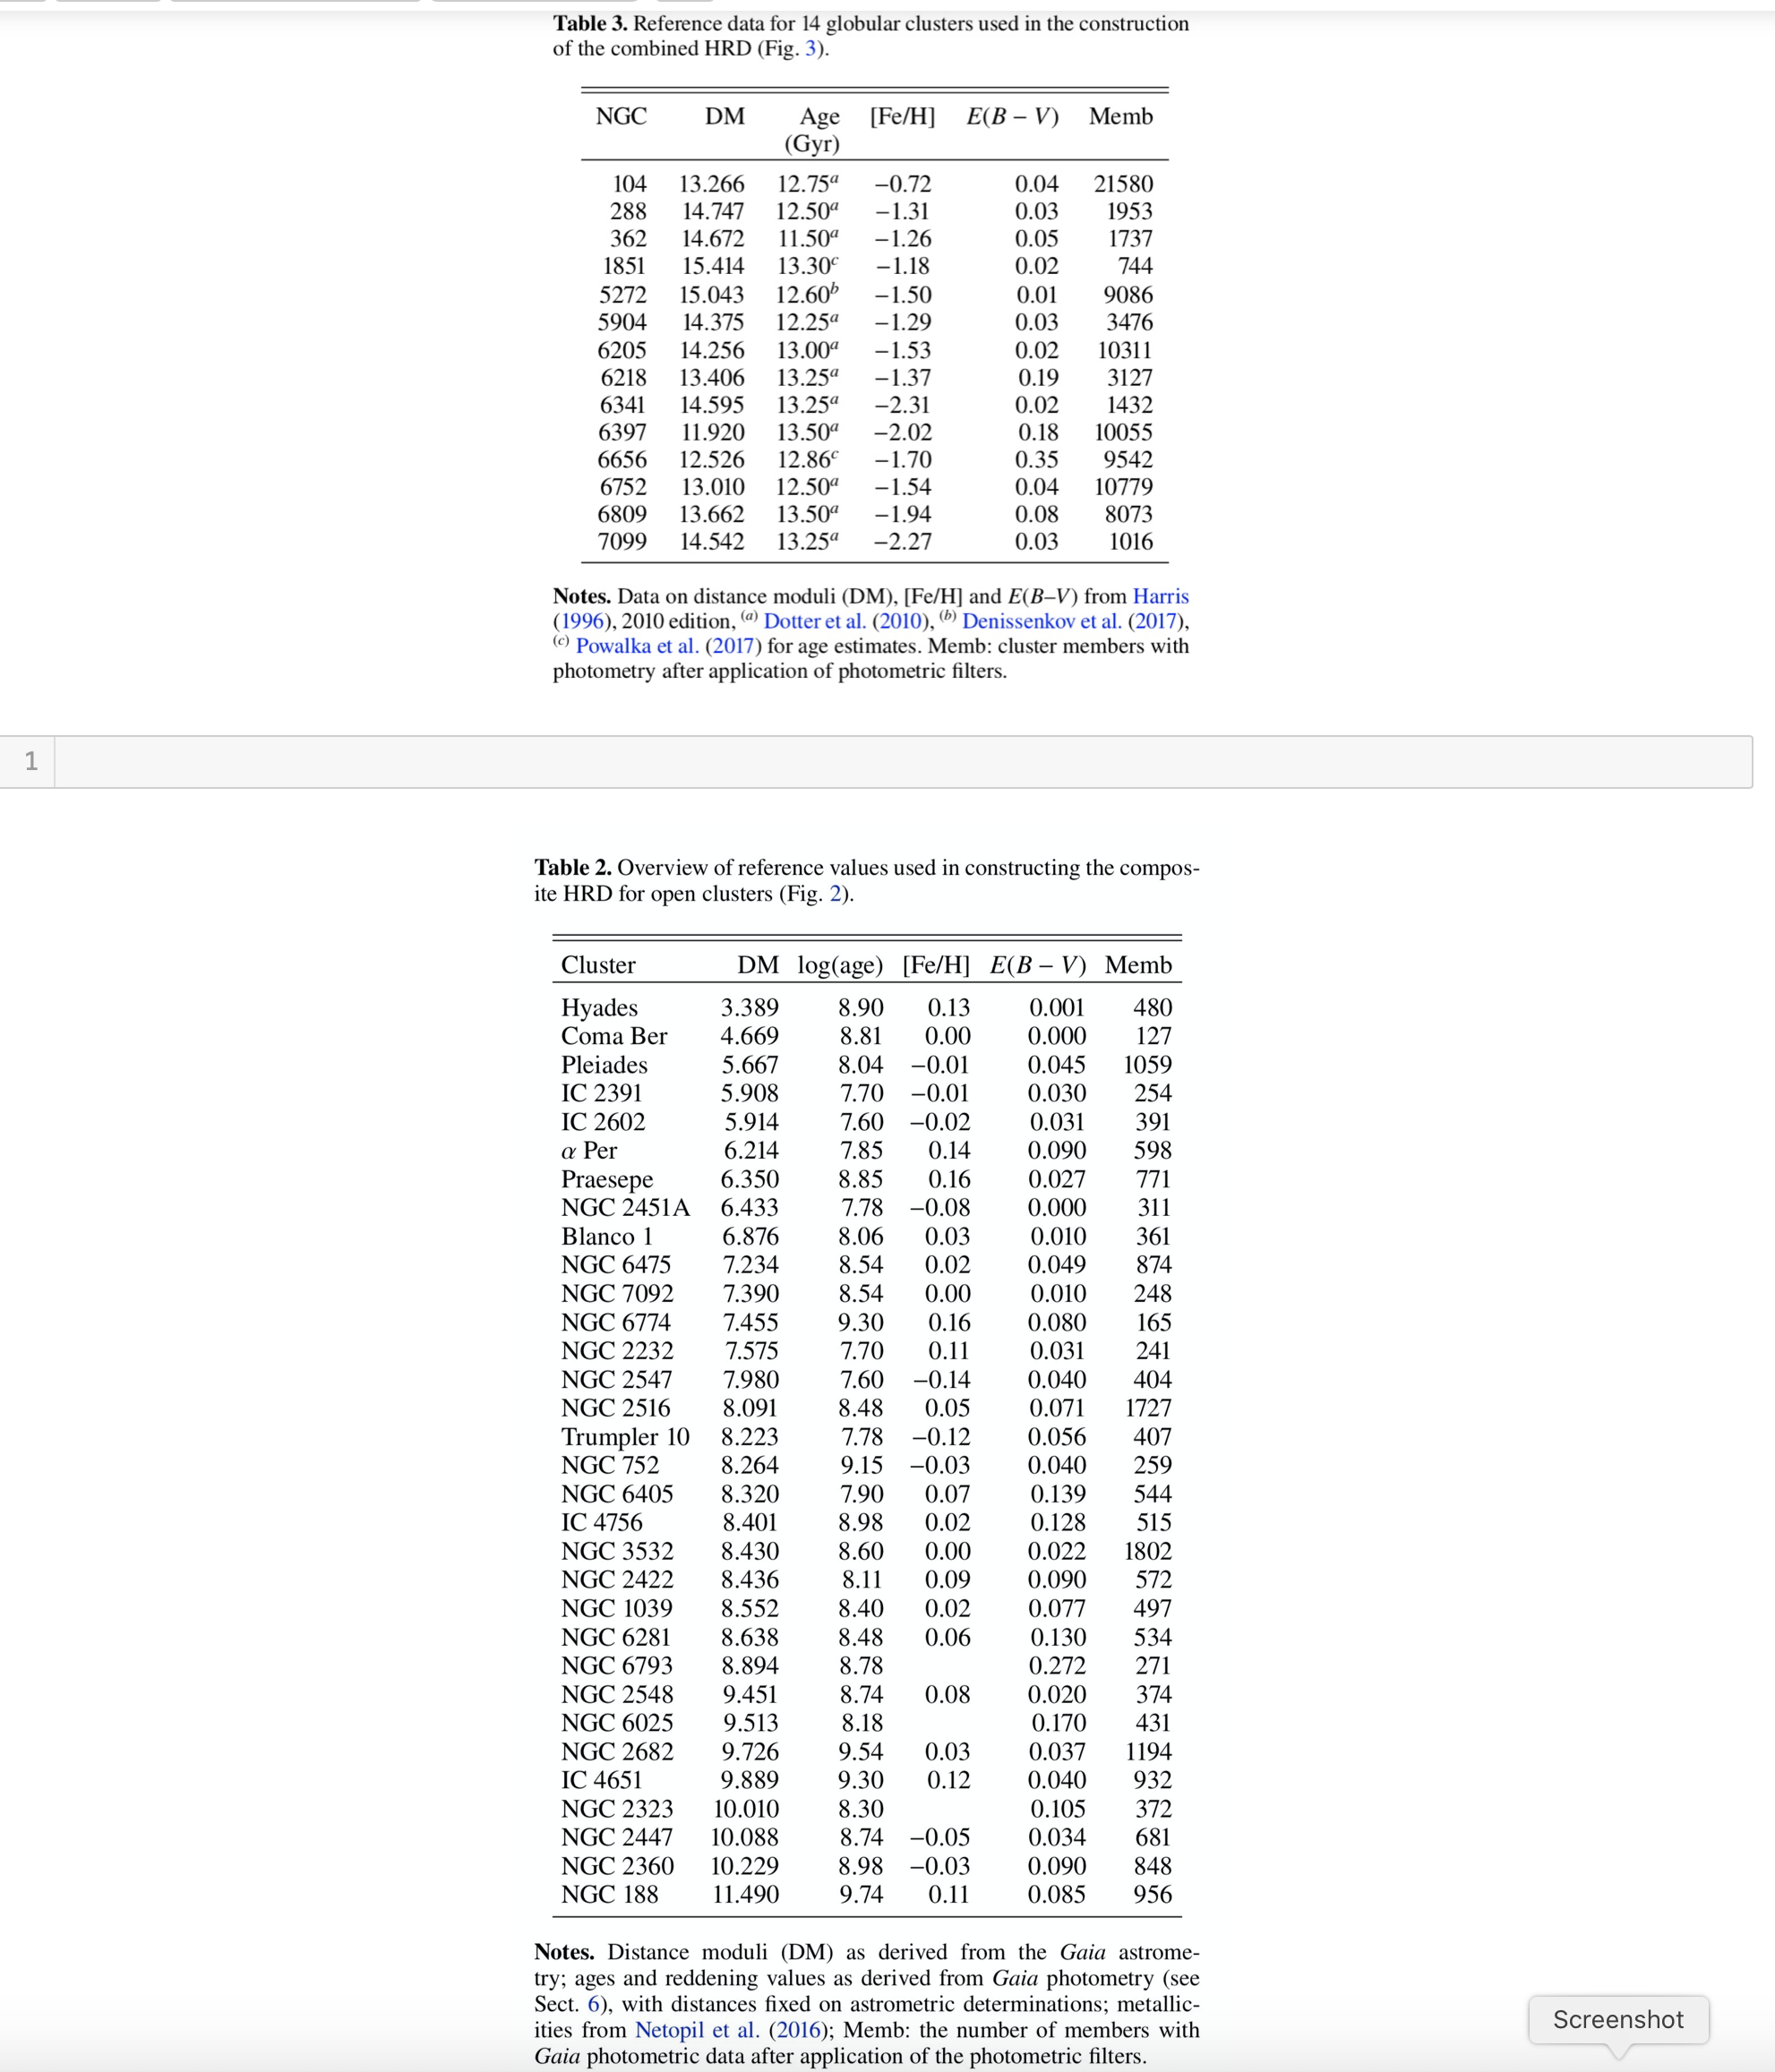

https://arxiv.org/pdf/1901.04733.pdf

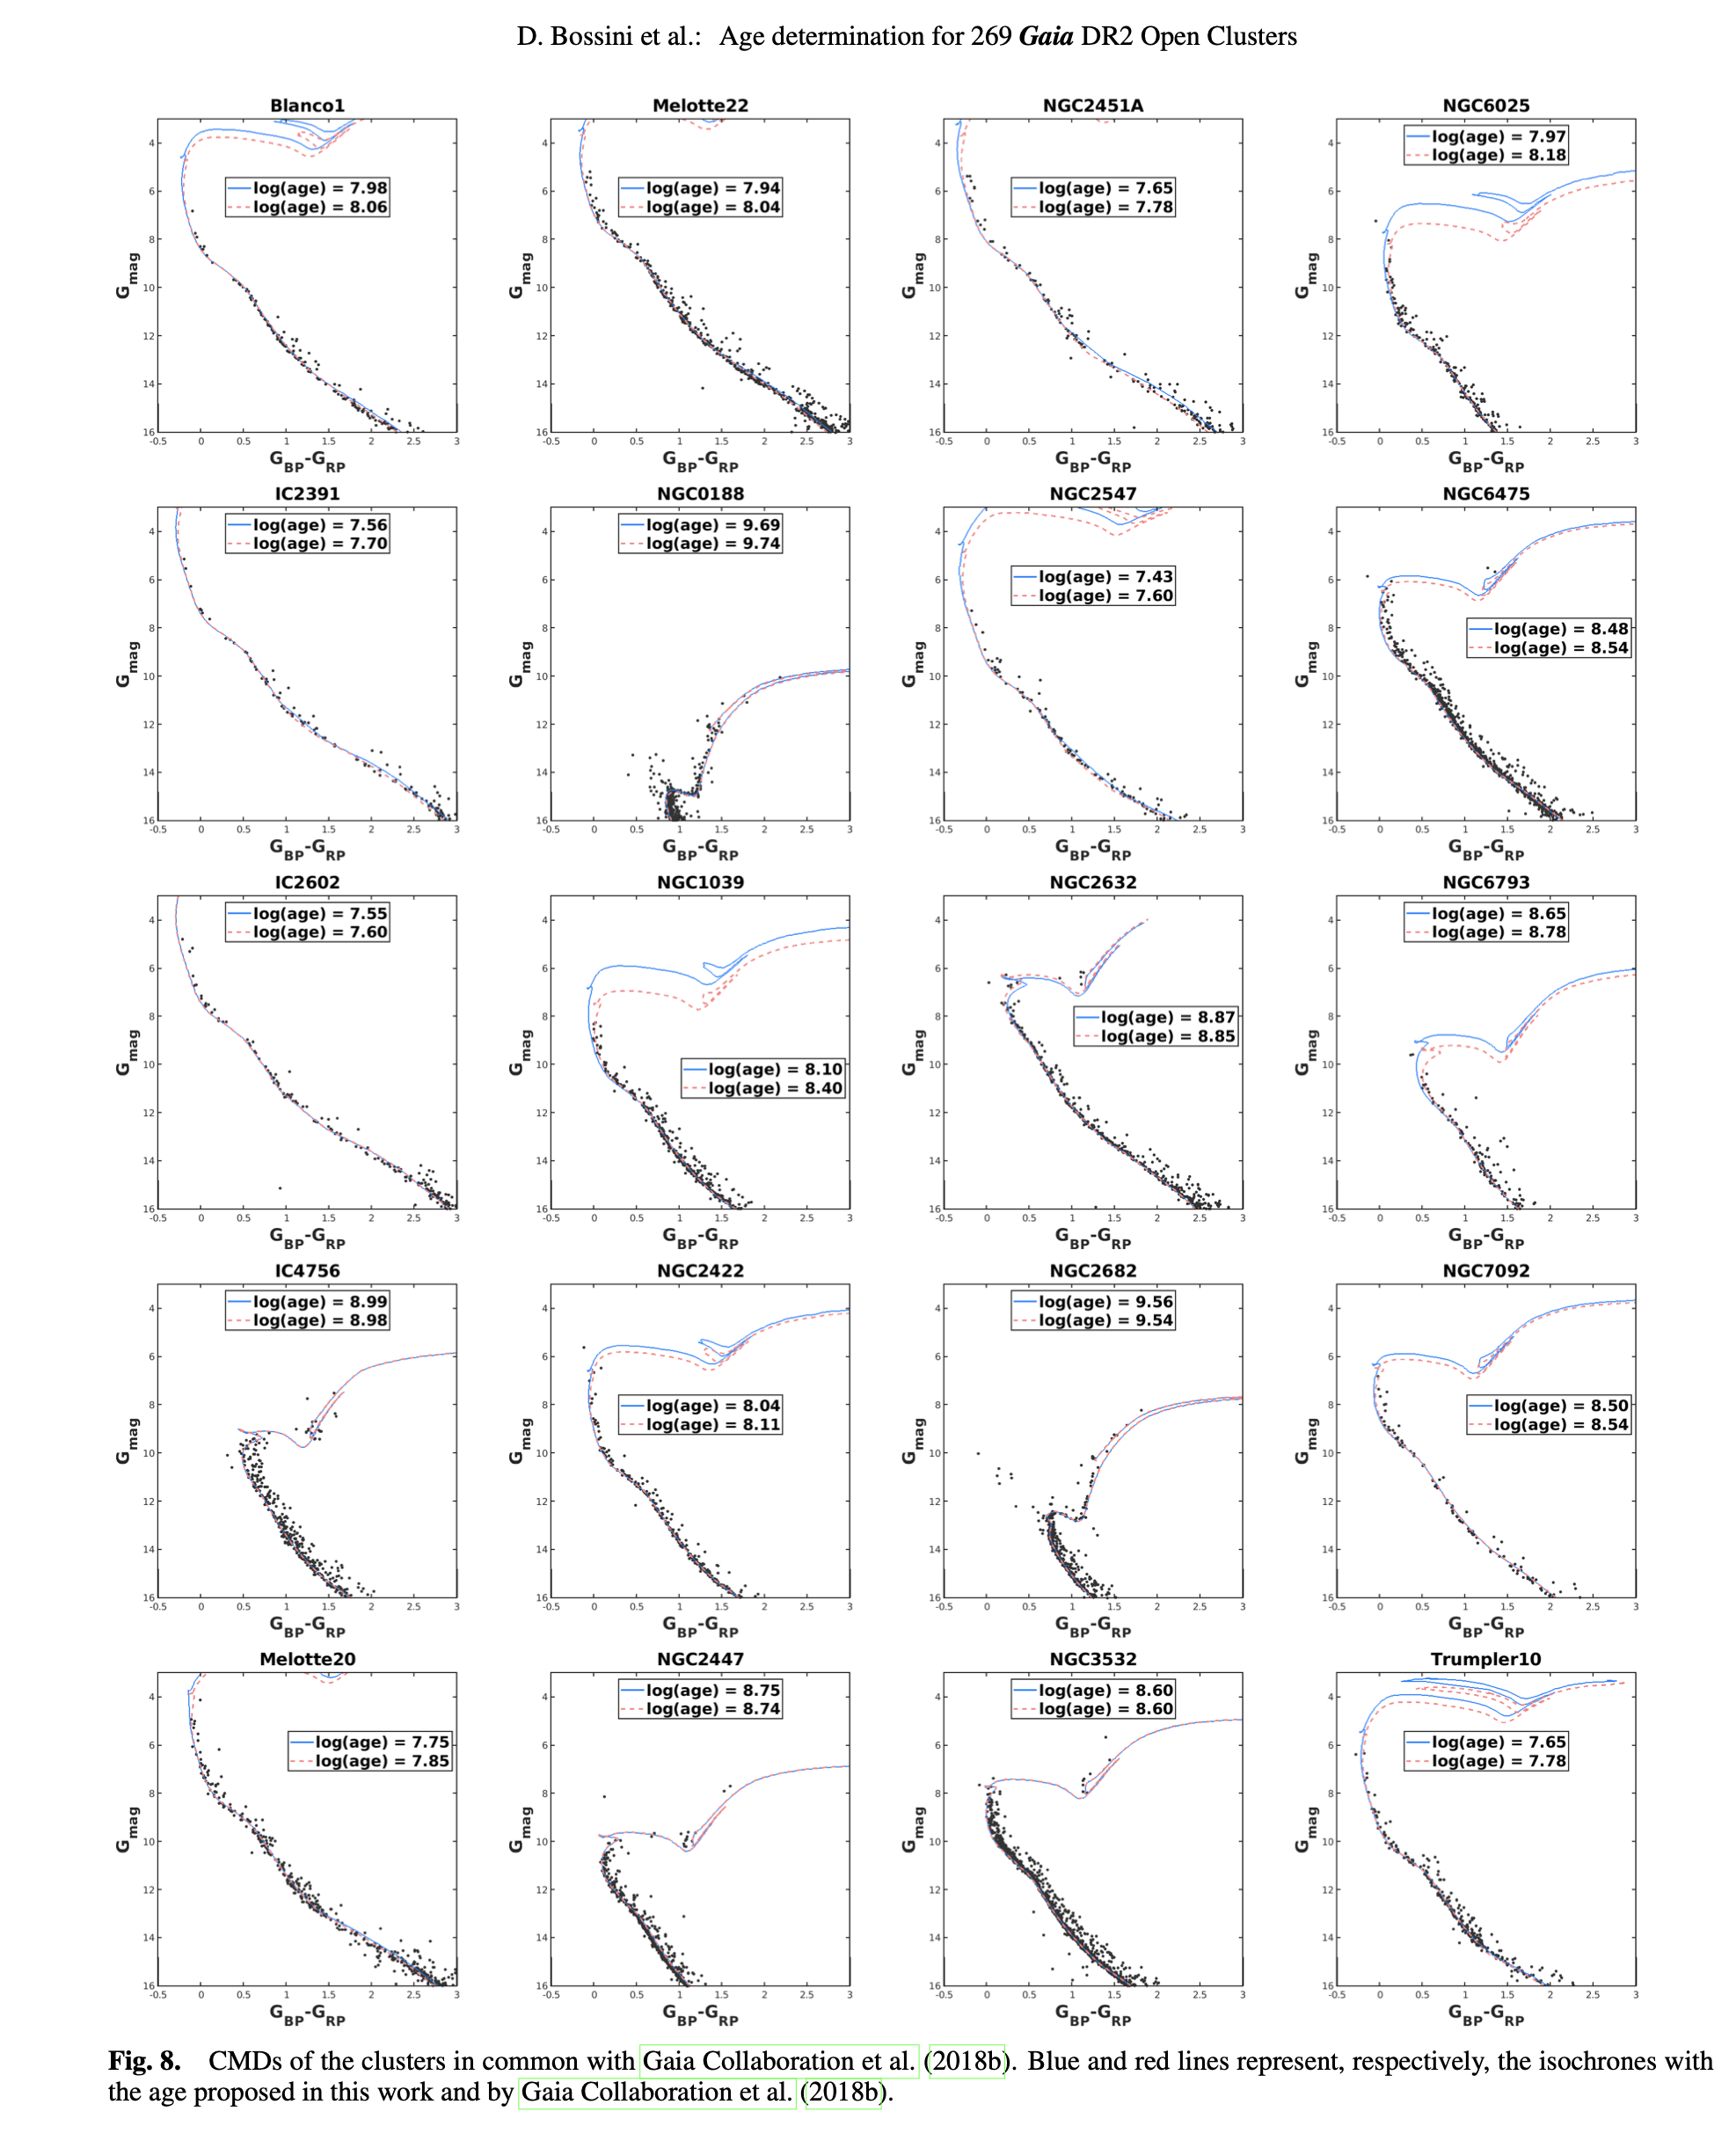

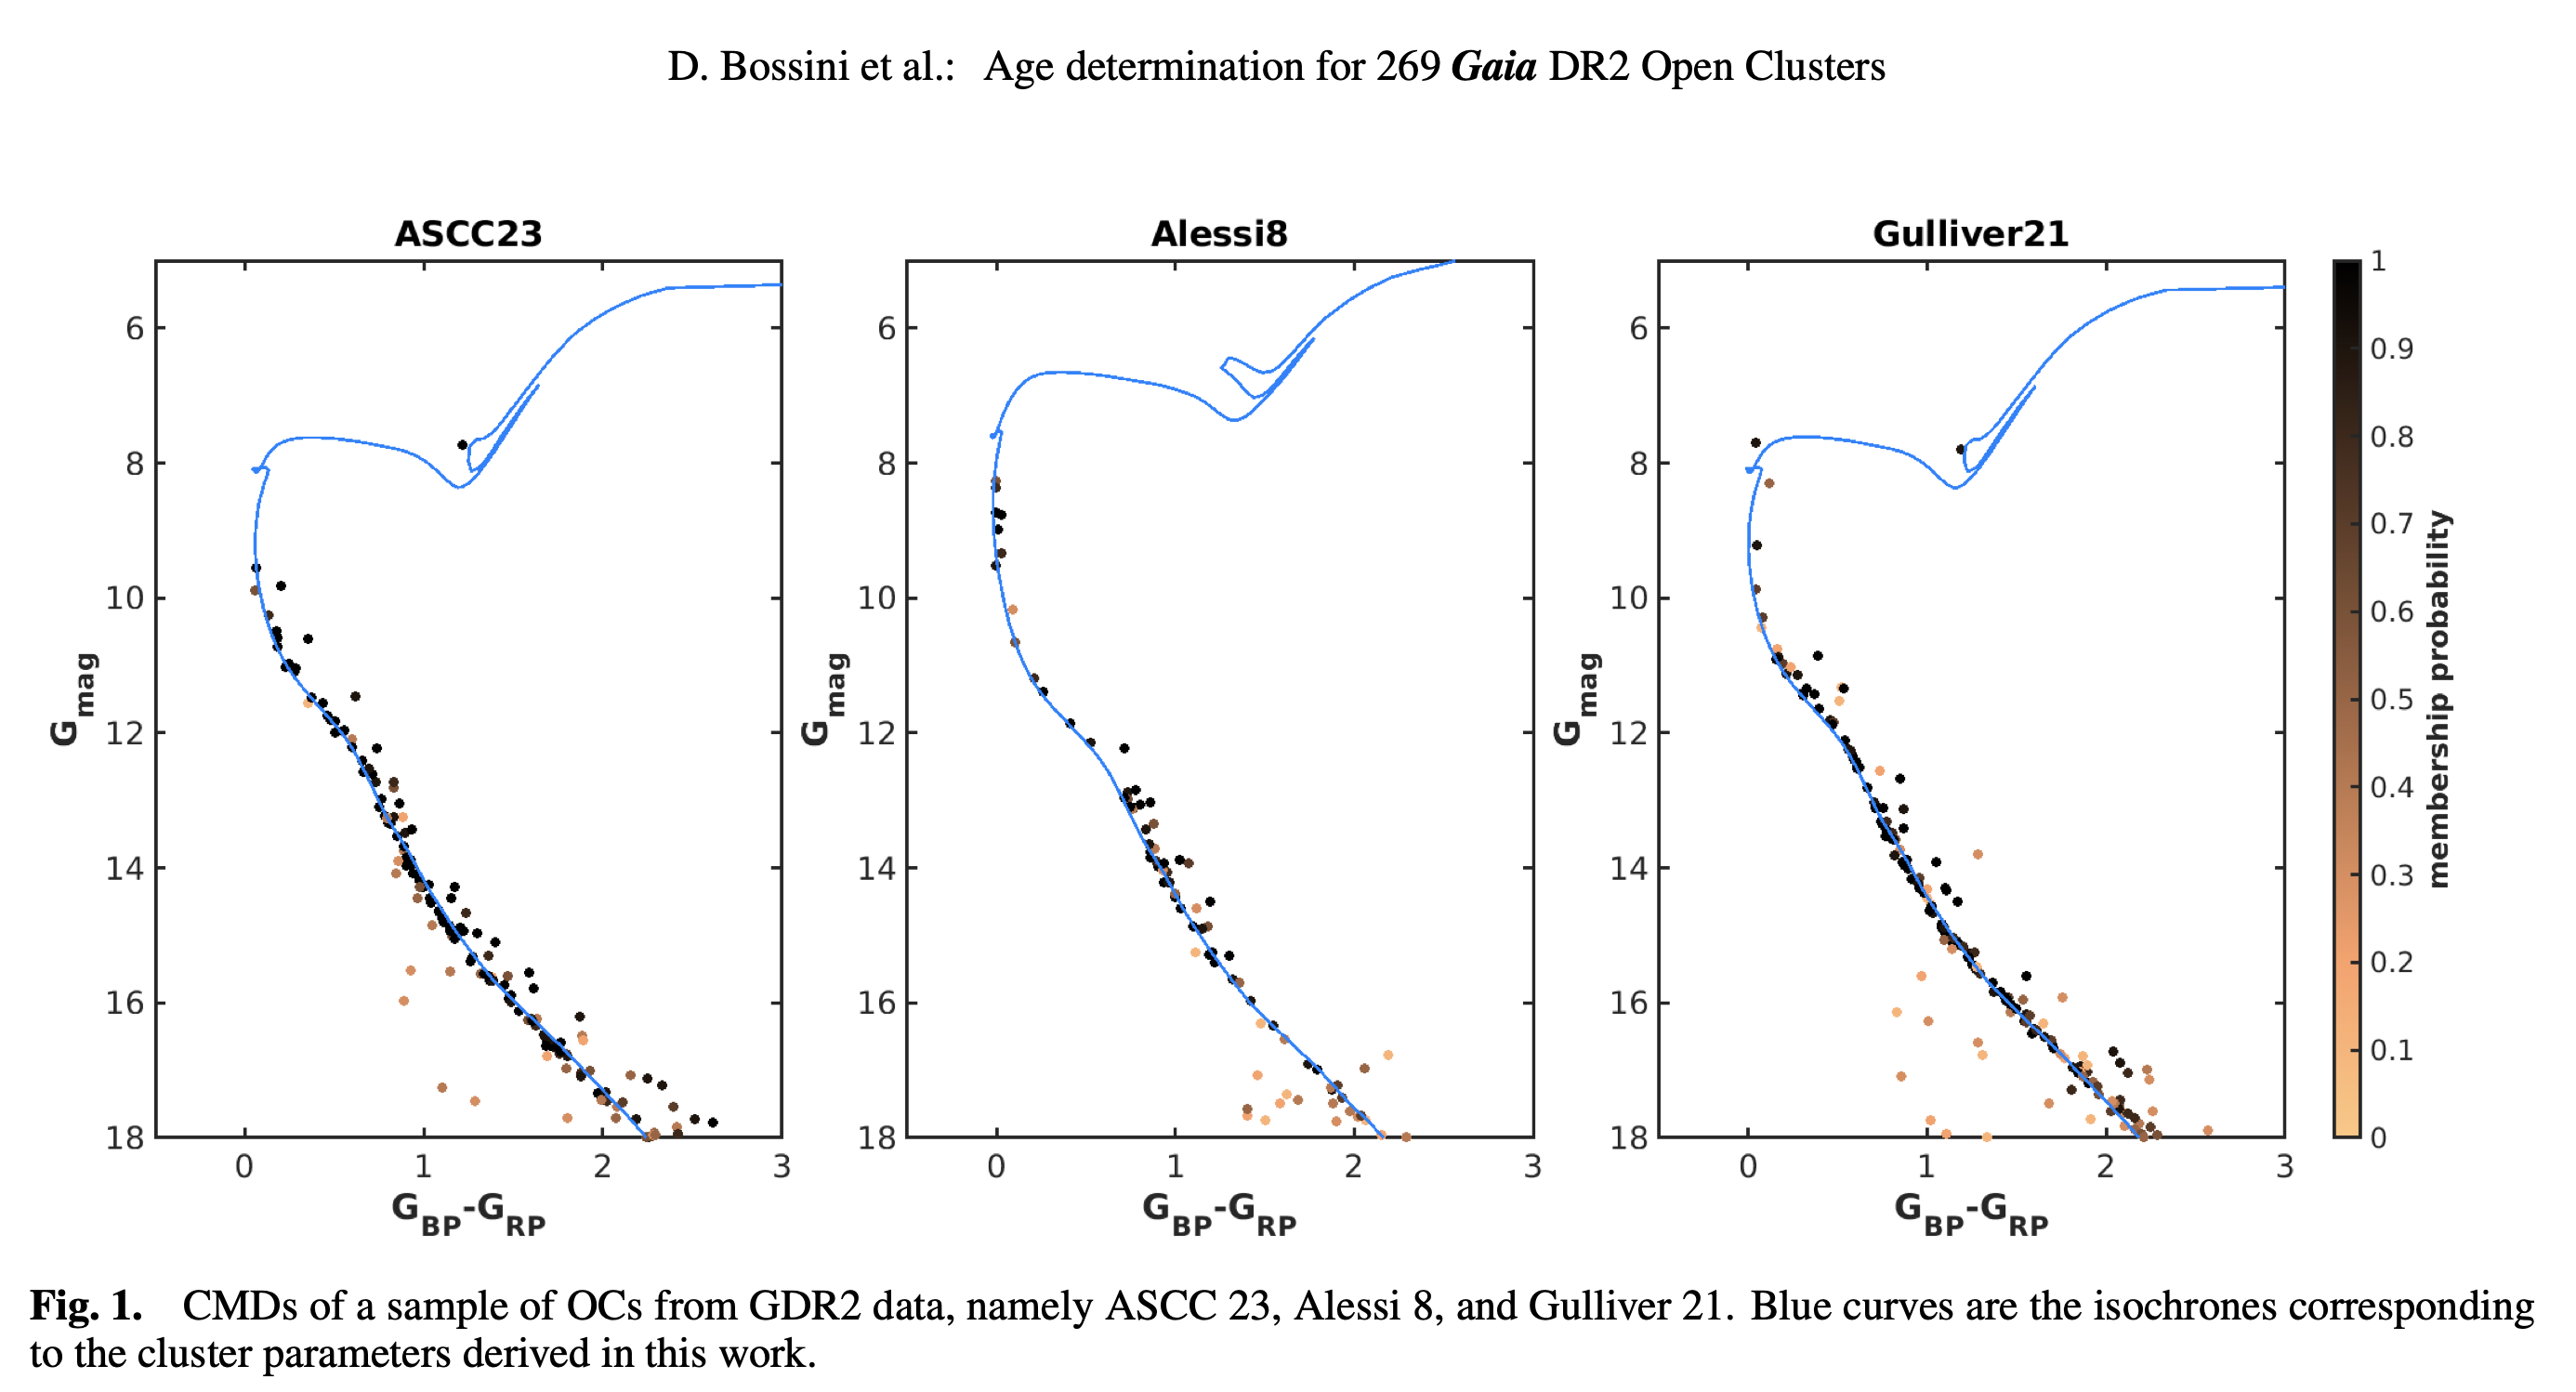

http://simbad.u-strasbg.fr/simbad/sim-fid

https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/623/A108

In [11]:
# Parallax conversion to Light Years

#p = 0.323

#abs(3261.56/p)

In [12]:
import imp
imp.reload(tb)

###                             Open Clusters

import ipywidgets as widgets
from IPython.display import display, clear_output

r1_select_variable = widgets.Dropdown(
     options=[
'Cl Alessi 1', 'Cl Alessi 2', 'Cl Alessi5', 'Cl Alessi6', 'Cl Alessi 8',
'Cl Alessi 10', 'Cl Alessi 12', 'Cl Alessi 19', 
'Cl Alessi 21','Cl Alessi24', 'Cl Alessi 37', 'Cl Alessi 60', 'Cl Alessi 62',

'NAME Alessi Teutsch 3', 'NAME Alessi Teutsch 11', 'NAME Alessi-Teutsch 12',
         
'ASCC6', 'ASCC10', 'ASCC13','ASCC16','ASCC19','ASCC21','ASCC22','ASCC23','ASCC29',
'ASCC32','ASCC41','ASCC58','ASCC71',
'ASCC101','ASCC105','ASCC108','ASCC112','ASCC113','ASCC114','ASCC115','ASCC124','ASCC128',
 
'Cl Basel11b','Cl Basel4','Cl Berkeley58','Cl Berkeley61','Cl Blanco1','Cl Bochum3',

'Cl Collinder140','Cl Collinder185','Cl Collinder258','Cl Collinder268','Cl Collinder292',
'Cl Collinder338','Cl Collinder394','Cl Collinder463',

'Cl Czernik12','Cl Czernik19','Cl Czernik25','Cl Czernik27','Cl Czernik31',
         
'ESO 166-4','ESO 368-11',
         
'Cl Ferrero 11',
         
'[FSR2007] 0357','[FSR2007] 0716','[FSR2007] 0735','[FSR2007] 0771','[FSR2007] 0866',
'[FSR2007] 0951','[FSR2007] 0968','[FSR2007] 1063','[FSR2007] 1085','[FSR2007] 1144',
'[FSR2007] 1211','[FSR2007] 1252','[FSR2007] 1360','[FSR2007] 1723',     
         
'Cl Gulliver 1','Cl Gulliver 2','Cl Gulliver 3','Cl Gulliver 4','Cl Gulliver 5','Cl Gulliver 6','Cl Gulliver 21',
         
'Cl Haffner13','Cl Haffner14','Cl Haffner21','Cl Haffner22',
'Cl Haffner23','Cl Haffner26', 'Cl Haffner3', 'Cl Haffner6','Cl Haffner9',
         
'Cl Harvard5', 'Cl Harvard10',
         
'IC1369', 'IC2157', 'IC2391', 'IC2488', 'IC2602', 'IC2714', 'IC4651', 'IC4665', 'IC4725','IC4756',
         
'Cl King20', 'Cl King4', 'Cl King6',
         
'Cl Loden1194', 'Cl Lynga1', 'Cl Lynga2',
         
'Cl Mamajek4', 
         
'Melotte20', 'Melotte22', 'Melotte71',
         
'NGC0188','NGC0225','NGC0381','NGC0581','NGC0752',
'NGC1039','NGC1220','NGC1528','NGC1545','NGC1582','NGC1662','NGC1664','NGC1750','NGC1758',
'NGC1901','NGC1912','NGC1960',
'NGC2168','NGC2184','NGC2215','NGC2251','NGC2281','NGC2287',
'NGC2302','NGC2323','NGC2343','NGC2353','NGC2358','NGC2374','NGC2383','NGC2396',
'NGC2420','NGC2422','NGC2423','NGC2425','NGC2432','NGC2447','NGC2448','NGC2451A','NGC2451B','NGC2482',
'NGC2516','NGC2527','NGC2546','NGC2547','NGC2567','NGC2632','NGC2645','NGC2658','NGC2659','NGC2669','NGC2682',
'NGC2818','NGC2866','NGC2910','NGC2925','NGC2972',
'NGC3228','NGC3330','NGC3496','NGC3532',
'NGC4103','NGC4349','NGC4439','NGC4463','NGC4609','NGC4852',
'NGC5138','NGC5281','NGC5316','NGC5460','NGC5617','NGC5749','NGC5822',
'NGC6005','NGC6025','NGC6087','NGC6152','NGC6192','NGC6204','NGC6208','NGC6242','NGC6249','NGC6475','NGC6494',
'NGC6531','NGC6633','NGC6704','NGC6709','NGC6716','NGC6728','NGC6791','NGC6793',
'NGC6800','NGC6811','NGC6819','NGC6830','NGC6866','NGC6940','NGC6997',
'NGC7058','NGC7063','NGC7092','NGC7209','NGC7235','NGC7243','NGC7281','NGC7296','NGC7788',
         
'Cl Pismis4','Cl Platais 10','Cl Platais 3','Cl Platais 9', 'NAME Pozzo 1',
         
'Cl Roslund 3','Cl Roslund 6',
         
'Cl Ruprecht1','Cl Ruprecht 108','Cl Ruprecht115','Cl Ruprecht151','Cl Ruprecht 161','Cl Ruprecht 176',
'Cl Ruprecht 29','Cl Ruprecht 34','Cl Ruprecht 44','Cl Ruprecht 50','Cl Ruprecht 58','Cl Ruprecht 67',
'Cl Ruprecht 76','Cl Ruprecht 82','Cl Ruprecht 84','Cl Ruprecht93','Cl Ruprecht 98',

'Cl Stephenson 1','Cl Stock 1','Cl Stock 10','Cl Stock 12','Cl Stock 23',
         
'Cl Tombaugh 1',
         
'Cl Trumpler 1','Cl Trumpler 10','Cl Trumpler 11','Cl Trumpler 12','Cl Trumpler 18',
'Cl Trumpler 2','Cl Trumpler 21','Cl Trumpler 22','Cl Trumpler 26','Cl Trumpler 29',
'Cl Trumpler 30','Cl Trumpler 7','Cl Trumpler 9',

'Cl VDBH 111','Cl VDBH 164','Cl VDBH 99',
         
'Cl Waterloo 7',
         
    'Choose a target'],
    value='Choose a target',
    description='Target:',
    disabled=False,
)
def get_variable(b):
    clear_output
    print(r1_select_variable.value)
    
display(r1_select_variable)

Dropdown(description='Target:', index=268, options=('Cl Alessi 1', 'Cl Alessi 2', 'Cl Alessi5', 'Cl Alessi6', …

In [13]:
target1 = r1_select_variable.value
print("Target: " + str(target1))
    
if target1[:4] == 'ASCC':
    target2 = '[KPR2005] ' + str(target1[4:]) 

s = Simbad()
s.add_votable_fields('parallax')
parallax_object = s.query_object(target1)
#parallax_object = s.query_object(target2)
parallax_value = float(parallax_object["PLX_VALUE"])
print("Parallax: " + str(parallax_value ))

ly_value = int(round(abs(3261.56/parallax_value),0))
print("\nLY: " + str(ly_value))

Target: Cl Alessi 1
Parallax: 1.39

LY: 2346


In [14]:
import GaiaFunctionstDictArc as arc

sArc = float(arc.getStarArc(target1))
print("Angular diamenter: " + str(sArc))

sWiki = arc.getStarWiki(target1)
print(sWiki)

Angular diamenter: 60.0
Messier_1


In [15]:
cRADIUS = round((dms_to_dd('+', 0, sArc, 0)/2),4)
print("RADIUS: " + str(cRADIUS))

RADIUS: 0.5


In [16]:
if target1 == 'OmegaCentauri':
    target1 = 'ngc5139'

In [17]:
print(target1[0:4])

if target1[:4] == 'ASCC':
    target1 = '[KPR2005] ' + str(target1[4:])

Cl A


In [18]:
target = str(target1)
print(str(target) + "\n")

s = Simbad()
s.add_votable_fields('parallax')
parallax_object = s.query_object(target)
parallax_value = float(parallax_object["PLX_VALUE"])
print("Parallax: " + str(parallax_value ))

ly_value = int(abs(3261.56/parallax_value))
print("\nLY: " + str(ly_value))

object = Simbad.query_object(target)
ra = object["RA"]

ra = object["RA"]
RA = ra.data[0]
print("\nRA: " + str(RA))

dec = object["DEC"]
DEC = dec.data[0]
print("DEC: " + str(DEC))

string = str(RA+ ' '+DEC)
c = SkyCoord(string, unit=(u.hourangle, u.deg))

Ra = str(round(c.ra.degree,4))
print("\nRa: " + str(Ra))

Dec = str(round(c.dec.degree,4))
print("Dec: " + str(Dec))

sRaDec = str(Ra+","+Dec)
print("\nRADIUS: " + str(cRADIUS))

Cl Alessi 1

Parallax: 1.39

LY: 2346

RA: 00 53 00
DEC: +49 33.0

Ra: 13.25
Dec: 49.55

RADIUS: 0.5


In [19]:
################################################## Medium ########################################################

In [20]:
timer_start()

bigstring = str("""SELECT all 
                    gaia_source.source_id,
                    gaia_source.ra,
                    gaia_source.ra_error,
                    gaia_source.dec,
                    gaia_source.dec_error,
                    gaia_source.parallax,
                    gaia_source.parallax_error,
                    gaia_source.pmra,
                    gaia_source.pmra_error,
                    gaia_source.pmdec,
                    gaia_source.pmdec_error,
                    gaia_source.phot_g_mean_mag,
                    gaia_source.phot_bp_mean_mag,
                    gaia_source.phot_rp_mean_mag,
                    gaia_source.bp_rp,
                    gaia_source.bp_g,
                    gaia_source.g_rp,
                    gaia_source.dr2_radial_velocity,
                    gaia_source.dr2_radial_velocity_error  
                    FROM gaiaedr3.gaia_source  
    WHERE CONTAINS(POINT('ICRS',gaiaedr3.gaia_source.ra,gaiaedr3.gaia_source.dec),
    CIRCLE('ICRS',""" + 
    sRaDec + "," + str(cRADIUS) + 
    "))=1 " + """
   AND gaia_source.parallax IS NOT NULL 
   AND phot_g_mean_flux_over_error>50 
   AND phot_rp_mean_flux_over_error>20 
   AND phot_bp_mean_flux_over_error>20 
   AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2) 
   AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2) 
   AND visibility_periods_used>8 
   AND astrometric_chi2_al/(astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5))) 
   AND gaia_source.bp_rp IS NOT NULL""")
                
job = Gaia.launch_job_async(bigstring, dump_to_file=False)
    
timer_stop()

INFO: Query finished. [astroquery.utils.tap.core]
5 seconds elapsed


In [21]:
print( "\n" + str(target) + "\n")

print(job)


Cl Alessi 1

<Table length=9466>
           name            dtype    unit                              description                             n_bad
------------------------- ------- -------- ------------------------------------------------------------------ -----
                source_id   int64          Unique source identifier (unique within a particular Data Release)     0
                       ra float64      deg                                                    Right ascension     0
                 ra_error float32      mas                                  Standard error of right ascension     0
                      dec float64      deg                                                        Declination     0
                dec_error float32      mas                                      Standard error of declination     0
                 parallax float64      mas                                                           Parallax     0
           parallax_error float32     

In [22]:
# load results into a pandas dataframe

r1 = (job.get_results()).to_pandas()

In [23]:
###

if target1[0:9] == '[KPR2005]':
    target1 = 'ASCC' + str(target1[10:])
    
if target1[0:9] == '[FSR2007]':
    target1 = 'FSR' + str(target1[10:])

#print(target1[0:3])
    
if target1[0:5] == 'Cl VD':
    target1 = str(target1[5:])
    
if target1[0:3] == 'Cl ':
    target1 = str(target1[3:])
    
if target1[0:5] == 'NAME ':
    target1 = str(target1[5:])


#t = r1_select_variable.value
t = target1

sf = str(sArc).replace('.', '_')

r1.to_csv("./Documents/Gaia DR9/" + str(t) + "_EDR3_OC_Arc_"  + str(sf) + '_M' + str(r1.shape[0]) +  ".csv")

print("\nTarget medium size: " + str(t) + " Done!")

###


Target medium size: Alessi 1 Done!


In [24]:
#######################################################################################################################

In [25]:
timer_start()

r1['SpT2'] = r1.apply(lambda row: starcolorindexSpT.subclass[round(row.bp_rp, 2)], axis=1)

r1['M'] = r1['phot_g_mean_mag'] + 5*np.log10(r1['parallax']) - 10
r1['AbsoluteMagnitude'] = r1['phot_g_mean_mag'] + 5*np.log10(r1['parallax']) - 10

r1['LY'] = abs(3261.56/r1['parallax'])
r1['LightYears'] = abs(3261.56/r1['parallax'])

r1['T_K'] = [5601/np.power(c+0.4,2/3) for c in r1['bp_rp']]
r1['Teff'] = [5601/np.power(c+0.4,2/3) for c in r1['bp_rp']]

r1['L_sun'] = np.power(10,[(4.77-m)/2.5 for m in r1['M']])
r1['Luminosity'] = np.power(10,[(4.77-m)/2.5 for m in r1['M']])

r1['R_sun']=np.around(np.sqrt(r1['L_sun'])/(r1['T_K']/5800)**2, decimals=2) # T_☉ = 5800
r1['Radius']=np.around(np.sqrt(r1['L_sun'])/(r1['T_K']/5800)**2, decimals=2) # T_☉ = 5800

print("Finished!")

timer_stop()

Finished!
0.29 seconds elapsed


In [26]:
# Translate Simbad names

target0 = target1

if target1[0:9] == '[KPR2005]':
    target1 = 'ASCC' + str(target1[10:])
    
if target1[0:9] == '[FSR2007]':
    target1 = 'FSR' + str(target1[10:])

#print(target1[0:3])

if target1[0:3] == 'Cl ':
    target1 = str(target1[3:])
    
print(target0)
print(target1)

Alessi 1
Alessi 1


In [27]:
s = Simbad()
s.add_votable_fields('parallax')
parallax_object = s.query_object(target)
parallax_value = float(parallax_object["PLX_VALUE"])
#print("\nParallax: " + str(parallax_value ))

ly_value = int(abs(3261.56/parallax_value))
#print("\nLY: " + str(ly_value ))

#r1_ly = tb.getStarLy(target0)
r1_ly = ly_value

print(str(target1) + " Distance in Light Years: " + str(int(r1_ly)))

Alessi 1 Distance in Light Years: 2346


In [28]:
############################################## 10% Near and Far Distances ##############################

r1_before = r1_ly - (r1_ly * .25)
r1_after = r1_ly + (r1_ly * .25)
r1_near = r1_ly - (r1_ly * .1)
r1_far = r1_ly + (r1_ly * .1)

r1_ly_before = r1.query('LightYears >=  @r1_before & LightYears < @r1_near')
r1_ly_near_side = r1.query('LightYears >= @r1_near & LightYears < @r1_ly')
r1_ly_far_side = r1.query('LightYears >= @r1_ly & LightYears < @r1_far')
r1_ly_target = r1.query('LightYears >= @r1_near & LightYears < @r1_far')
r1_ly_beyond = r1.query('LightYears >= @r1_far')

print("(" + str(target1) + ") Stars: " + 
      str(tb.getStarCount(target0)) +
      "\n Stars of target: " + 
      str(len(r1_ly_target)))

r1 = r1_ly_target

(Alessi 1) Stars: 1000
 Stars of target: 291


In [29]:
print("near: " + str(int(r1_near)) + " LY")
print("Target: " + str(int(r1_ly)) + " LY")
print("far: " + str(int(r1_far)) + " LY")
print("Slice: " + str(int(r1_far - r1_near)) + " LY")

near: 2111 LY
Target: 2346 LY
far: 2580 LY
Slice: 469 LY


In [30]:
print("Stars of target: " + str(len(r1_ly_target)))
print("Stars before target: " + str(len(r1_ly_before)))
print("Stars near target: " + str(len(r1_ly_near_side)))
print("Stars farther than target: " + str(len(r1_ly_far_side)))
print("Stars beyond target: " + str(len(r1_ly_beyond)))
#print("Stars in field of view: " + str(len(eval('df_'+ str(target1)))))
print("Stars in field of view: " + str(tb.getStarCount(target1)))

Stars of target: 291
Stars before target: 153
Stars near target: 157
Stars farther than target: 134
Stars beyond target: 8687
Stars in field of view: 1000


In [31]:
r1['LY'].describe()

count     291.000000
mean     2341.898878
std       128.886467
min      2112.312961
25%      2249.702282
50%      2328.525483
75%      2450.640263
max      2578.803711
Name: LY, dtype: float64

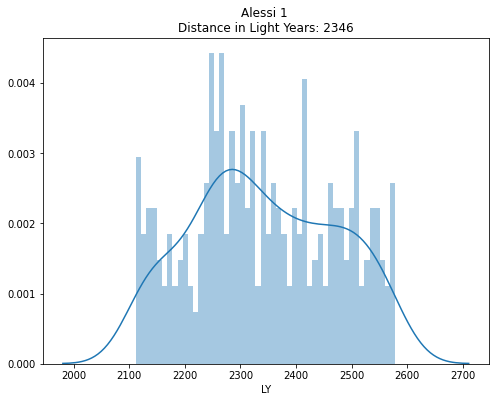

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams.update(Ipython_default);
plt.rcParams["figure.figsize"] = "8, 6"

# Plot a histogram with equally spaced bins
sns.distplot(r1['LY'],
             bins = 50, # try different numbers of bins
             kde=True,  # add a smooth curve using a kernel density estimate
)

plt.title(str(target1) + " \nDistance in Light Years: " + str(int(r1_ly)))

plt.show()

In [34]:
R_sun_limit = 150

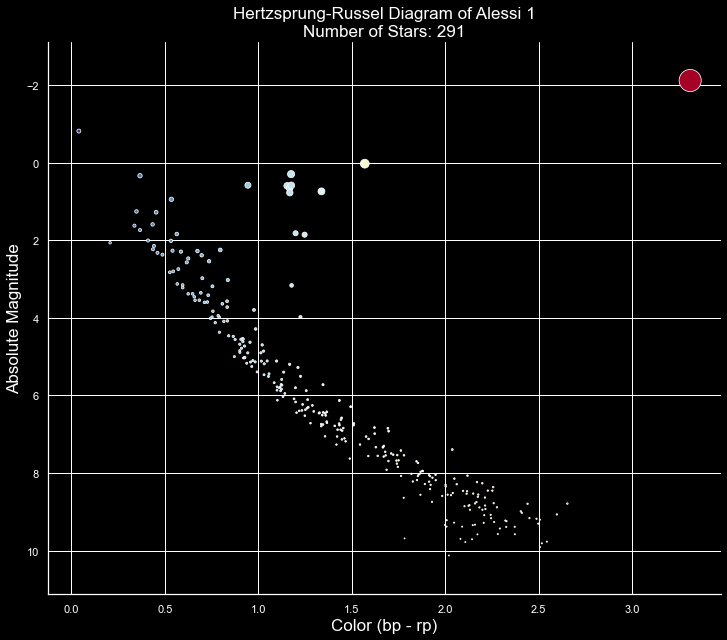

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

rr0 = r1[r1.R_sun > 0]
rr1 = r1[r1.R_sun < R_sun_limit]

plt.style.use('dark_background')
sns.relplot(x='bp_rp', y='M', height=8.5, aspect=1.2, legend=None,
            hue='bp_rp',
            palette='RdYlBu_r',
            size='R_sun',
            sizes=(1,rr1['R_sun'].max()/rr1['R_sun'].min()),
            data=rr1
            )
plt.ylim(rr1['M'].max()+1, rr1['M'].min()-1)
plt.xlabel('Color (bp - rp)', fontsize = 17)
plt.ylabel('Absolute Magnitude', fontsize = 17)
plt.title('Hertzsprung-Russel Diagram of ' + str(target1) + '\nNumber of Stars: ' + str(rr1.shape[0]), 
          fontsize = 17)

plt.show()

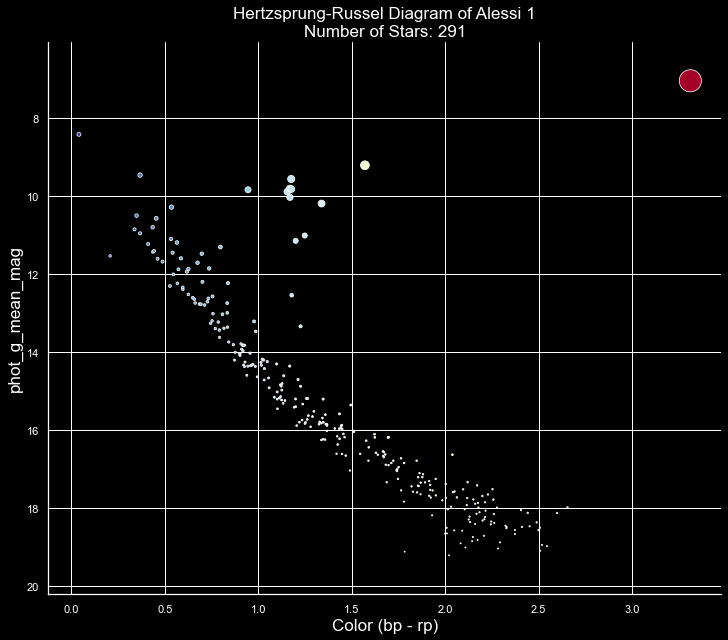

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

rr0 = r1[r1.R_sun > 0]
rr1 = r1[r1.R_sun < R_sun_limit]

plt.style.use('dark_background')
sns.relplot(x='bp_rp', y='phot_g_mean_mag', height=8.5, aspect=1.2, legend=None,
            hue='bp_rp',
            palette='RdYlBu_r',
            size='R_sun',
            sizes=(1,rr1['R_sun'].max()/rr1['R_sun'].min()),
            data=rr1
            )
plt.ylim(rr1['phot_g_mean_mag'].max()+1, rr1['phot_g_mean_mag'].min()-1)
plt.xlabel('Color (bp - rp)', fontsize = 17)
plt.ylabel('phot_g_mean_mag', fontsize = 17)
plt.title('Hertzsprung-Russel Diagram of ' + str(target1) + '\nNumber of Stars: ' + str(rr1.shape[0]), 
          fontsize = 17)

plt.show()

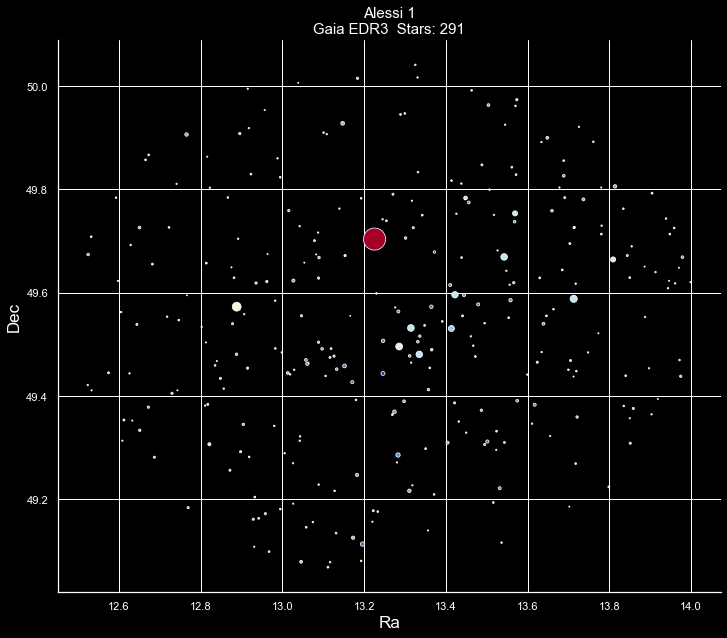


R_sun Max: 146.83


In [37]:
sns.set()

rr0 = r1[r1.R_sun > 0]
rr1 = r1[r1.R_sun < R_sun_limit]

plt.style.use('dark_background')
sns.relplot(x='ra', y='dec', height=8.5, aspect=1.2, legend=None,
            hue='bp_rp',
            palette='RdYlBu_r',
            size='R_sun',
            sizes=(1,rr1['R_sun'].max()/rr1['R_sun'].min()),
            data=rr1
            )
plt.xlabel('Ra', fontsize = 17)
plt.ylabel('Dec', fontsize = 17)
plt.title(str(target1) + '\nGaia EDR3  Stars: ' + str(rr1.shape[0]), fontsize=15)
plt.show()    

print('\nR_sun Max: ' + str(rr1['R_sun'].max()))

In [38]:
f1 = r1

df_class_O = f1[(f1['SpT2'] >= "O0V") & (f1['SpT2'] <= "O9V")]
df_class_B = f1[(f1['SpT2'] >= "B0V") & (f1['SpT2'] <= "B9V")]
df_class_A = f1[(f1['SpT2'] >= "A0V") & (f1['SpT2'] <= "A9V")]
df_class_F = f1[(f1['SpT2'] >= "F0V") & (f1['SpT2'] <= "F9V")]
df_class_G = f1[(f1['SpT2'] >= "G0V") & (f1['SpT2'] <= "G9V")]
df_class_K = f1[(f1['SpT2'] >= "K0V") & (f1['SpT2'] <= "K9V")]
df_class_M = f1[(f1['SpT2'] >= "M0V") & (f1['SpT2'] <= "M9V")]
df_class_L = f1[(f1['SpT2'] >= "L0V") & (f1['SpT2'] <= "L9V")]
df_class_T = f1[(f1['SpT2'] >= "T0V") & (f1['SpT2'] <= "T9V")]

print("\nClass B: " + str(df_class_B.shape[0]))
print("Class A: " + str(df_class_A.shape[0]))
print("Class F: " + str(df_class_F.shape[0]))
print("Class G: " + str(df_class_G.shape[0]))
print("Class K: " + str(df_class_K.shape[0]))
print("Class M: " + str(df_class_M.shape[0]))
print("Class L: " + str(df_class_L.shape[0]))
print("Class T: " + str(df_class_T.shape[0]))


Class B: 0
Class A: 6
Class F: 38
Class G: 33
Class K: 117
Class M: 76
Class L: 0
Class T: 0


In [39]:
f1['Star_Type'] = ""

In [40]:
f1['Star_Type'] = np.where(f1.SpT2.between('O0', 'O9V'), 'Class O', f1['Star_Type'])
f1['Star_Type'] = np.where(f1.SpT2.between('B0', 'B9V'), 'Class B', f1['Star_Type'])
f1['Star_Type'] = np.where(f1.SpT2.between('A0', 'A9V'), 'Class A', f1['Star_Type'])
f1['Star_Type'] = np.where(f1.SpT2.between('F0', 'F9V'), 'Class F', f1['Star_Type'])
f1['Star_Type'] = np.where(f1.SpT2.between('G0', 'G9V'), 'Class G', f1['Star_Type'])
f1['Star_Type'] = np.where(f1.SpT2.between('K0', 'K9V'), 'Class K', f1['Star_Type'])
f1['Star_Type'] = np.where(f1.SpT2.between('M0', 'M9.5V'), 'Class M', f1['Star_Type'])
f1['Star_Type'] = np.where(f1.SpT2.between('L0', 'L9.5V'), 'Class L', f1['Star_Type'])
f1['Star_Type'] = np.where(f1.SpT2.between('T0', 'T9.5V'), 'Class T', f1['Star_Type'])

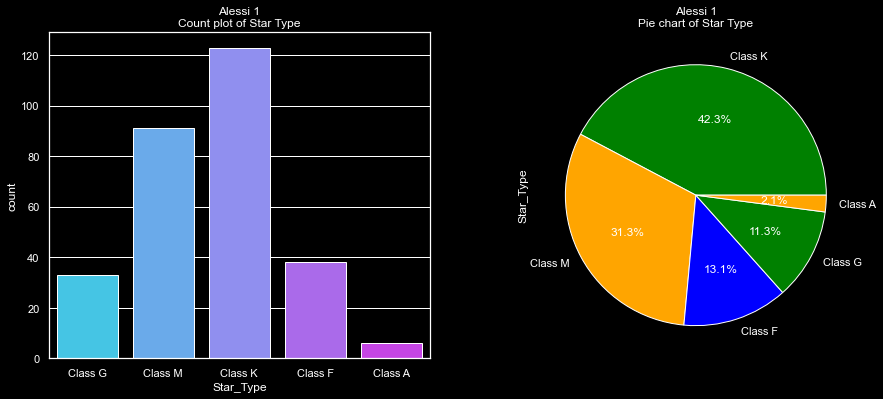

In [41]:
plt.style.use('dark_background')
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.countplot(x = 'Star_Type' , palette= 'cool', data= f1) 
plt.title(str(target1) + "\nCount plot of Star Type")

plt.subplot(1,2,2)
count = f1['Star_Type'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['green','orange','blue'],
               title = str(target1) + "\nPie chart of Star Type")
plt.show()

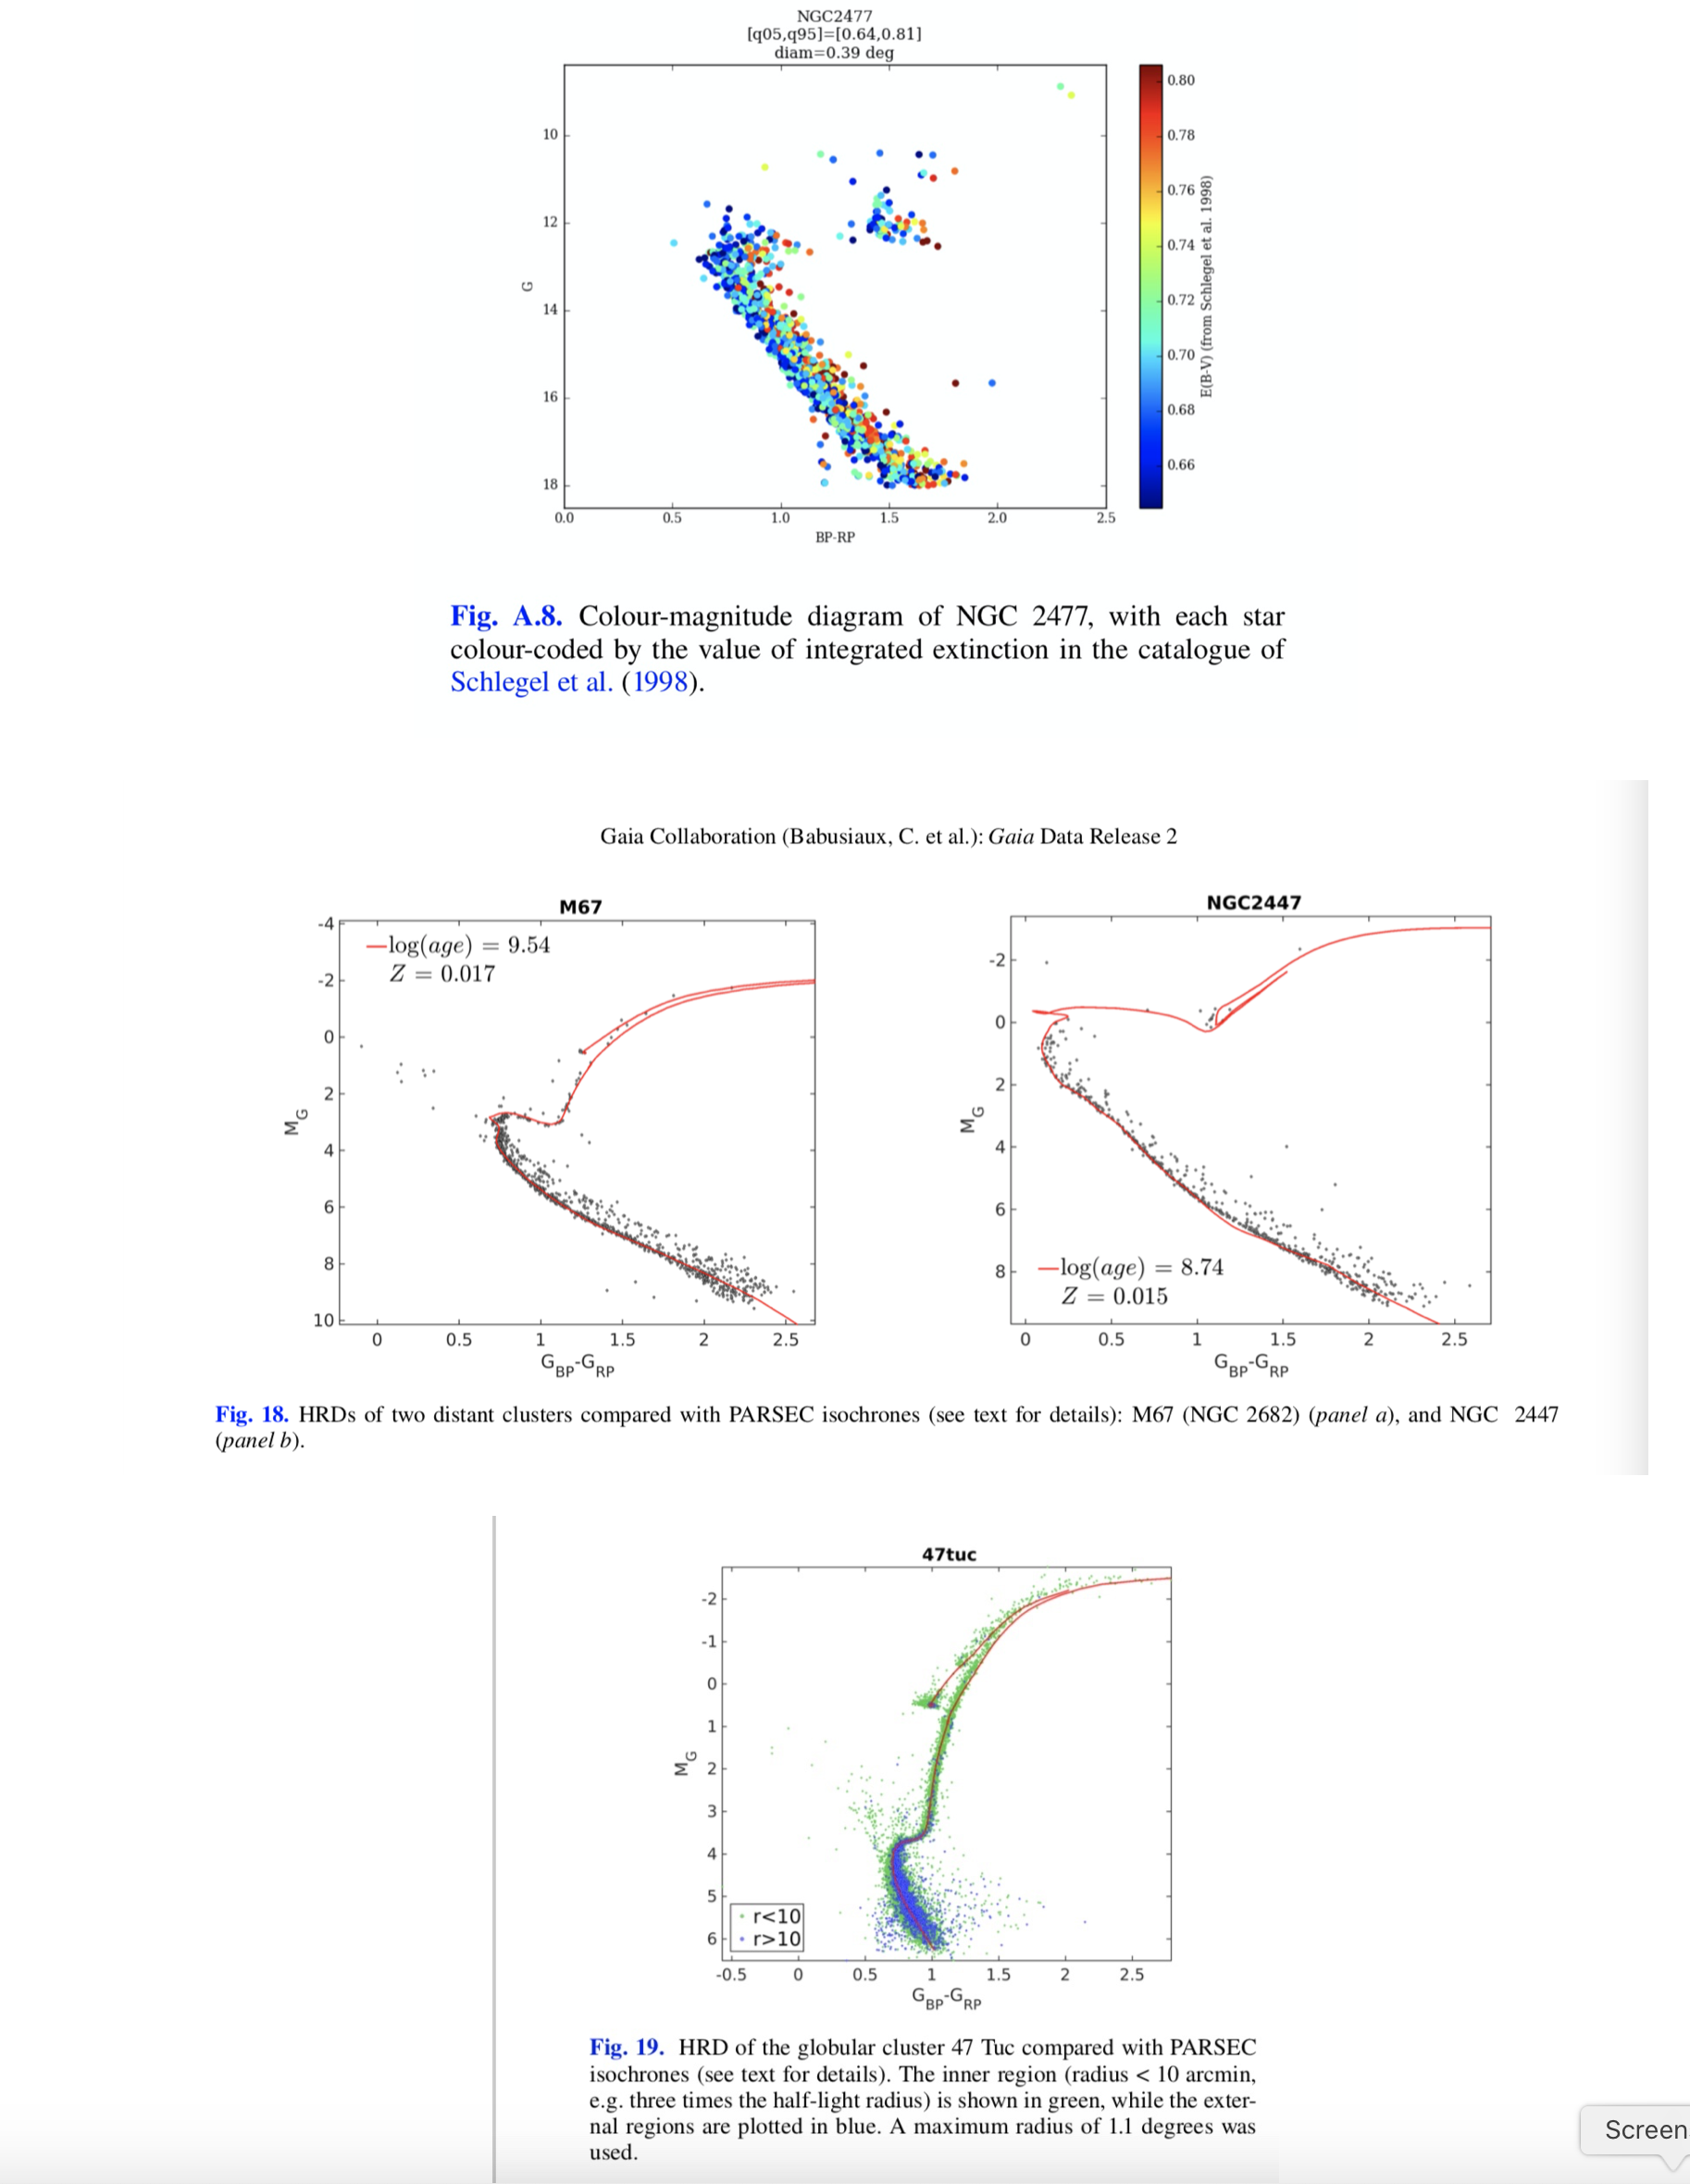